# import all stuff

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# imports and prints a results file
just for one file

In [7]:
data = pd.read_csv('/Users/carlacoca/Documents/master_internship/experiment_output_pilots/behavioural_files/behavioural_output_sub-801_session-01_dummy_2024-09-09_15-09-26.csv', delimiter=';')

print(data)

     trial  emotional_cue_time response objectively_correct  \
0        0        1.725887e+09      NaN                Late   
1        1        1.725887e+09     down                Even   
2        2        1.725887e+09     down                Even   
3        3        1.725887e+09       up                Even   
4        4        1.725888e+09       up                Even   
..     ...                 ...      ...                 ...   
663    663        1.725892e+09      NaN                Late   
664    664        1.725892e+09     down               False   
665    665        1.725892e+09       up                True   
666    666        1.725892e+09     down                True   
667    667        1.725892e+09     down                True   

    subjectively_correct  response_time   RT_s  feedback_time  stimuli_type  \
0                   Late   1.725887e+09  1.201   1.725887e+09             1   
1                  False   1.725887e+09  0.394   1.725887e+09             3   
2     

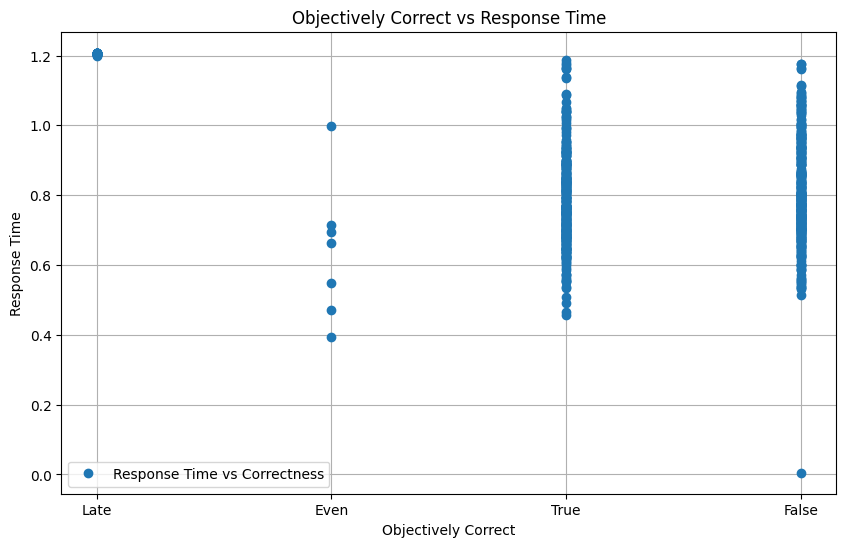

In [8]:
#load csv to data frame
objectively_correct = data['objectively_correct']
response_time = data['RT_s']

plt.figure(figsize=(10, 6))
plt.plot(objectively_correct, response_time, 'o', label='Response Time vs Correctness')

plt.xlabel('Objectively Correct')
plt.ylabel('Response Time')
plt.title('Objectively Correct vs Response Time')

plt.legend()
plt.grid(True)
plt.show()
#combine participants into 1 big data frame and automate this to ease it for following sessions 
#have data for all participants 
#Have participants alternating performance, and look at window 6 trials after every switch so find out a way to plot that specifically creating a specific line for each participant instead of the average 

# Concatenating all the participants together

In [11]:
import pandas as pd
import glob2

# Directory path where your CSV files are stored
directory_path = '/Users/carlacoca/Documents/master_internship/experiment_output_pilots/behavioural_files/'

# Use glob2 to get a list of all CSV files in the directory
csv_files = glob2.glob(directory_path + "*.csv")

# List to hold each participant's data as a DataFrame
dataframes = []

# Loop over each file in the directory
for file_name in csv_files:
    # Extract the actual file name without the full path
    base_name = file_name.split('/')[-1]

    # Extract participant ID from the file name
    participant_id = base_name.split('_')[2]  # e.g., 'sub-801'

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_name)

    # Add a column for the participant ID
    df['participant_id'] = participant_id

    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all the DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Display or save the combined DataFrame
print(combined_df.head())

combined_df.to_csv('/Users/carlacoca/Documents/master_internship/experiment_output_pilots/combined_behavioral_data.csv', index=False)

  trial;emotional_cue_time;response;objectively_correct;subjectively_correct;response_time;RT_s;stimuli_type;iti;probability_condition;face_type;stimuli_name;reward_amount  \
0  0;1720003852.6171713;up;Even;False;1720003853....                                                                                                                          
1  1;1720003857.950667;down;Even;True;1720003858....                                                                                                                          
2  2;1720003863.2989242;up;Even;False;1720003863....                                                                                                                          
3  3;1720003867.63681;down;Even;True;1720003868.2...                                                                                                                          
4  4;1720003871.9802082;down;Even;False;172000387...                                                                         

# Automating the process of concatenating participant data 



In [46]:
import pandas as pd
import glob2
#remove even trials before exporting them 
# Directory path where your CSV files are stored
directory_path = '/Users/carlacoca/Documents/master_internship/experiment_output_pilots/behavioural_files/'

# Use glob2 to get a list of all CSV files in the directory
csv_files = glob2.glob(directory_path + "*.csv")

# List to hold each participant's session data as a DataFrame
dataframes = []

# Loop over each file in the directory
for file_name in csv_files:
    # Extract the actual file name without the full path
    base_name = file_name.split('/')[-1]
    
    # Debugging: Print file name to check parsing
    print(f"Processing file: {base_name}")
    
    # Extract participant ID (e.g., 'sub-801') and session number (e.g., 'session-01')
    try:
        participant_id = base_name.split('_')[2]  # 'sub-801'
        session_number = base_name.split('_')[3]  # 'session-01'
        
        # Debugging: Print extracted participant ID and session number
        print(f"Participant ID: {participant_id}, Session Number: {session_number}")
    except IndexError:
        print(f"Error extracting participant ID or session number from file: {base_name}")
        continue  # Skip to the next file if there's an error
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_name, delimiter = ';')
    df['participant_id'] = participant_id
    df['session_number'] = session_number
    dataframes.append(df)
    # Append the DataFrame to the list
df_w_participant_id = pd.concat(dataframes, ignore_index=True)
# Concatenate all the DataFrames into one
print(df_w_participant_id)
# Optionally save the combined DataFrame to a new CSV file
df_w_participant_id.to_csv('/Users/carlacoca/Documents/master_internship/experiment_output_pilots/df_w_participant_id.csv', index=False, sep= ';')

Processing file: behavioural_output_sub-915_session-01_dummy_2024-07-03_12-47-41.csv
Participant ID: sub-915, Session Number: session-01
Processing file: behavioural_output_sub-809_session-01_dummy_2024-09-12_13-45-03.csv
Participant ID: sub-809, Session Number: session-01
Processing file: behavioural_output_sub-810_session-01_dummy_2024-09-12_15-39-04.csv
Participant ID: sub-810, Session Number: session-01
Processing file: behavioural_output_sub-802_session-01_dummy_2024-09-10_11-06-48.csv
Participant ID: sub-802, Session Number: session-01
Processing file: behavioural_output_sub-902_session-01_dummy_2024-06-26_13-40-01.csv
Participant ID: sub-902, Session Number: session-01
Processing file: behavioural_output_sub-907_session-01_dummy_2024-06-27_15-07-37.csv
Participant ID: sub-907, Session Number: session-01
Processing file: behavioural_output_sub-811_session-01_dummy_2024-09-16_11-39-56.csv
Participant ID: sub-811, Session Number: session-01
Processing file: behavioural_output_sub-9

# Producing data for each participant 

Index(['trial', 'emotional_cue_time', 'response', 'objectively_correct',
       'subjectively_correct', 'response_time', 'RT_s', 'stimuli_type', 'iti',
       'probability_condition', 'face_type', 'stimuli_name',
       'reward_amount,participant_id,session_number,trial',
       'emotional_cue_time.1', 'response.1', 'objectively_correct.1',
       'subjectively_correct.1', 'response_time.1', 'RT_s.1', 'feedback_time',
       'stimuli_type.1', 'iti.1', 'probability_condition.1', 'face_type.1',
       'stimuli_name.1', 'reward_amount'],
      dtype='object')
Original column names:
Index(['trial', 'emotional_cue_time', 'response', 'objectively_correct',
       'subjectively_correct', 'response_time', 'RT_s', 'stimuli_type', 'iti',
       'probability_condition', 'face_type', 'stimuli_name',
       'reward_amount,participant_id,session_number,trial',
       'emotional_cue_time.1', 'response.1', 'objectively_correct.1',
       'subjectively_correct.1', 'response_time.1', 'RT_s.1', 'feedback

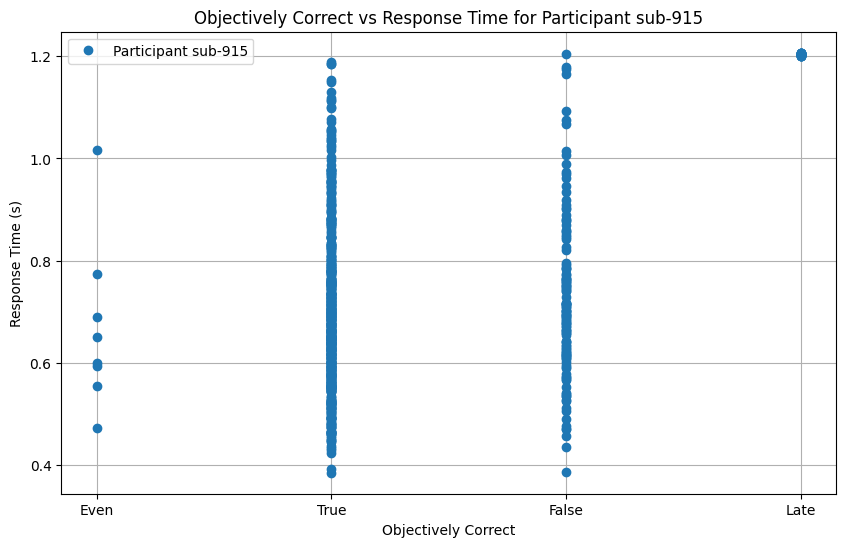

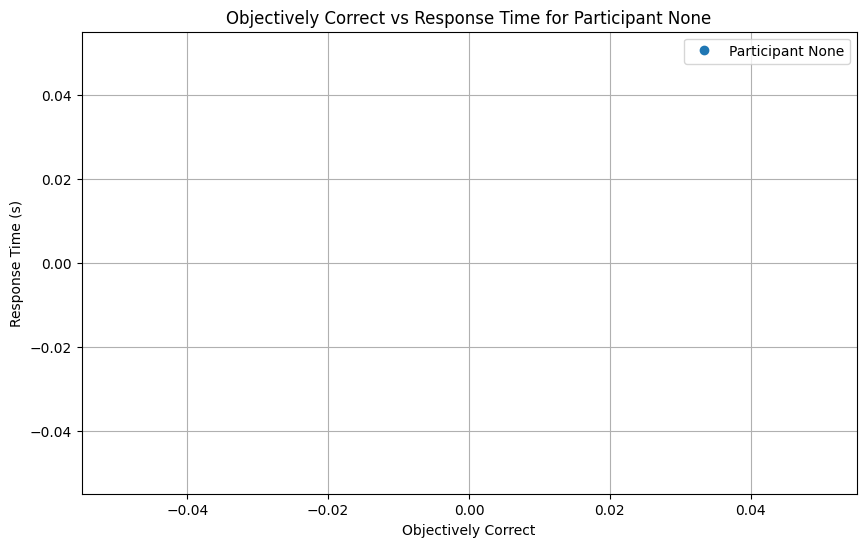

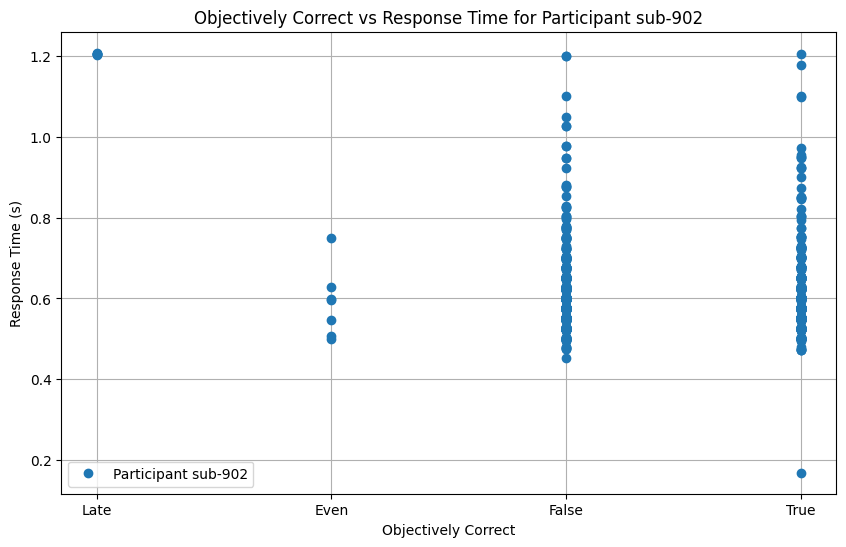

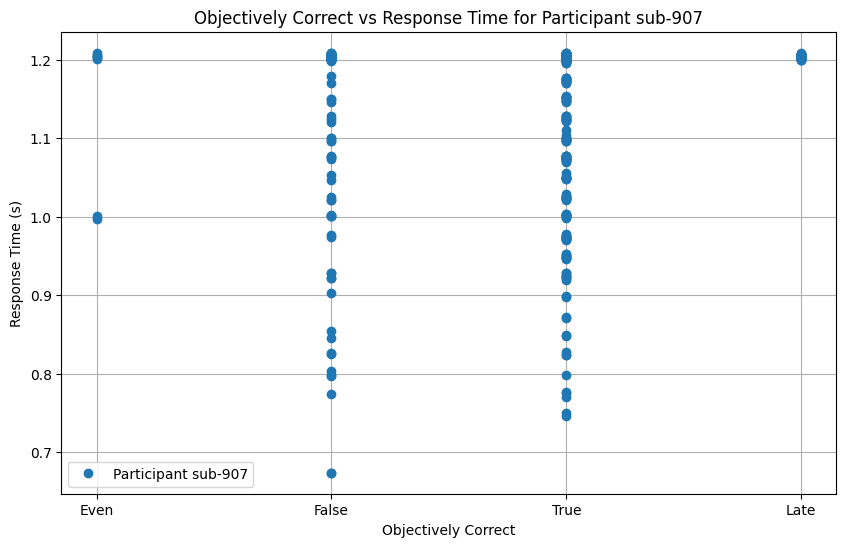

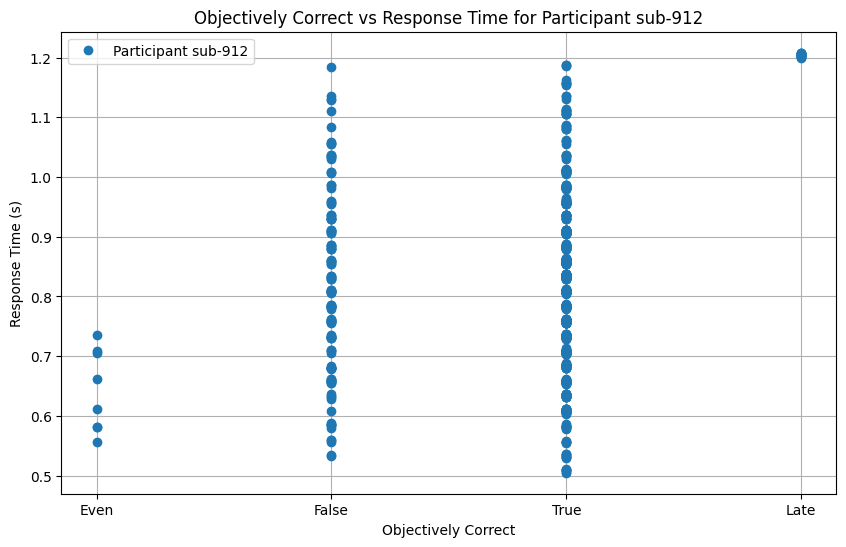

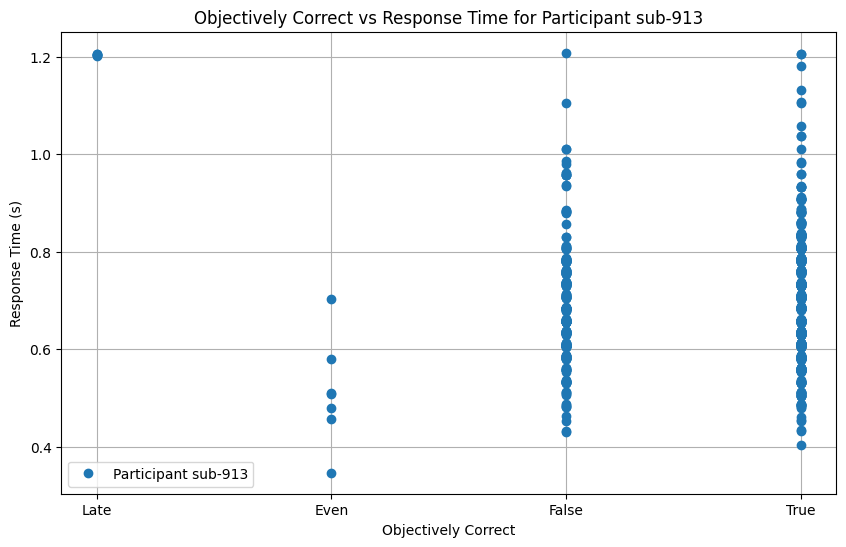

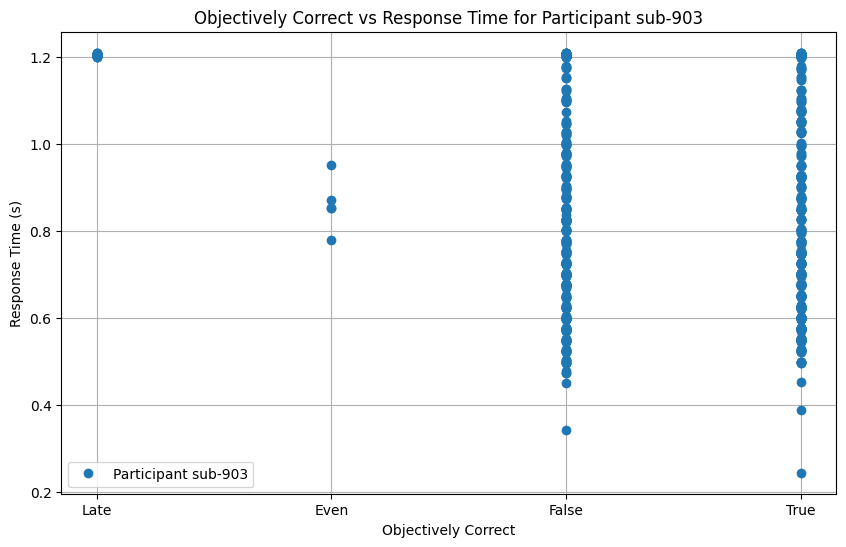

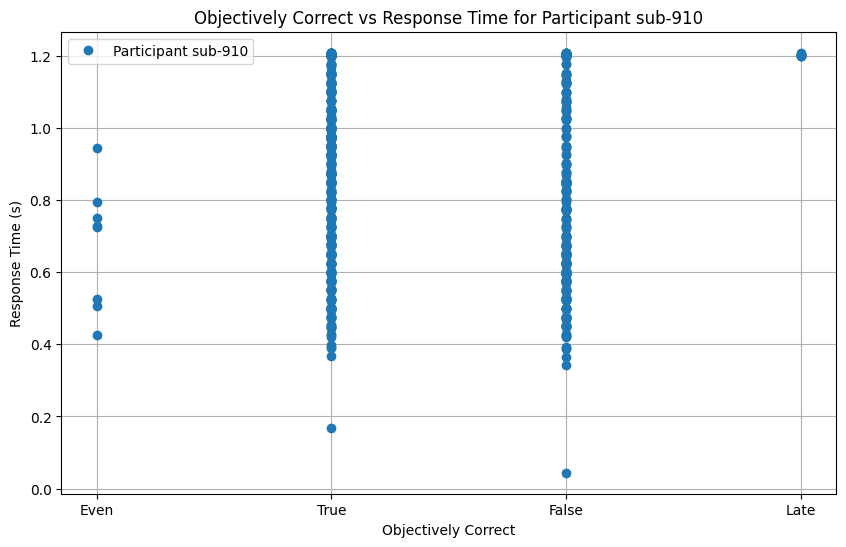

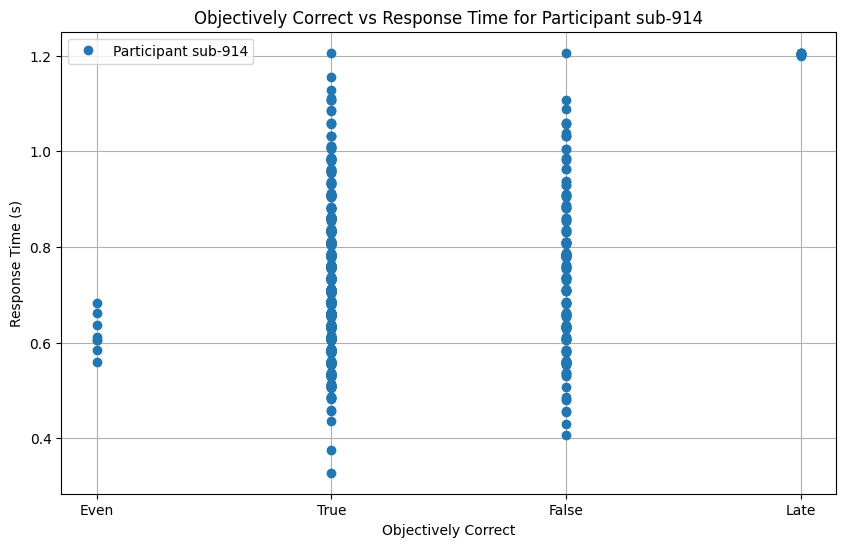

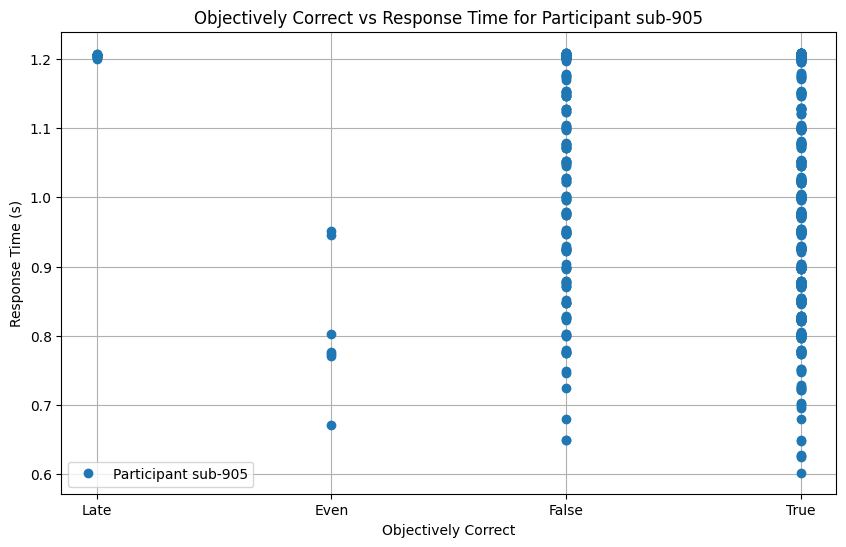

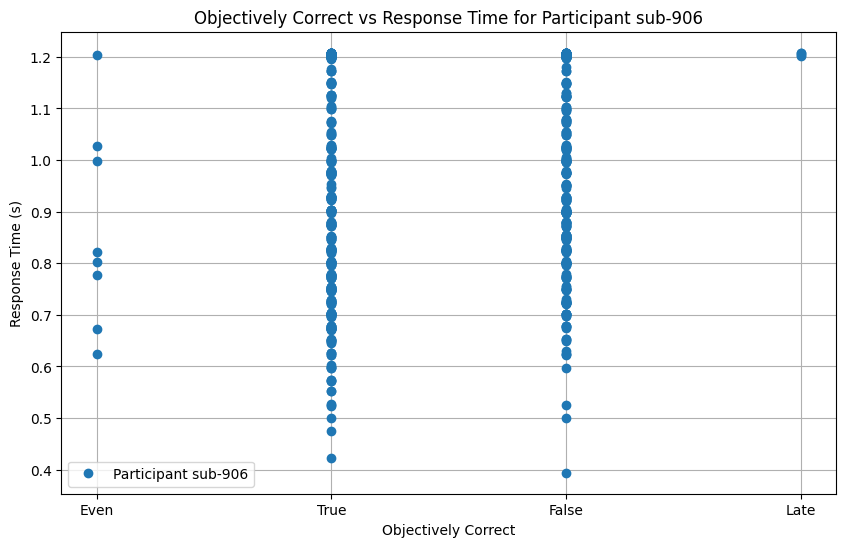

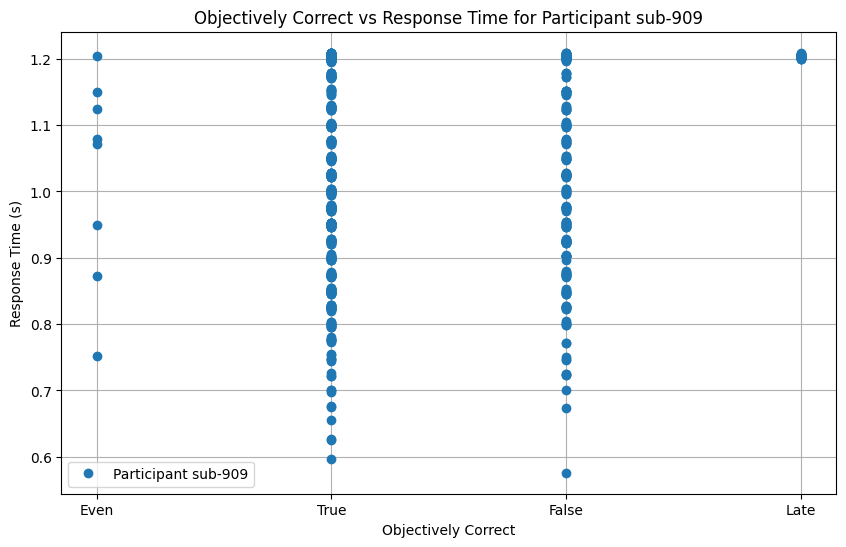

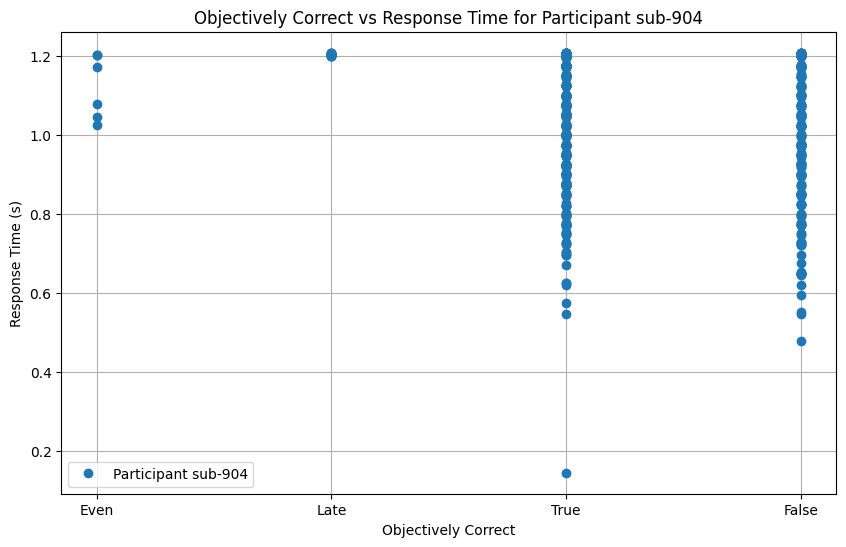

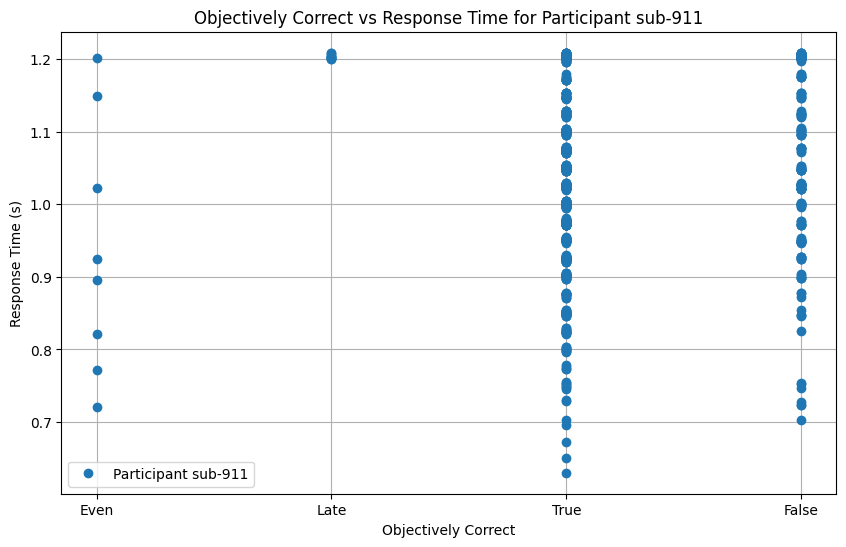

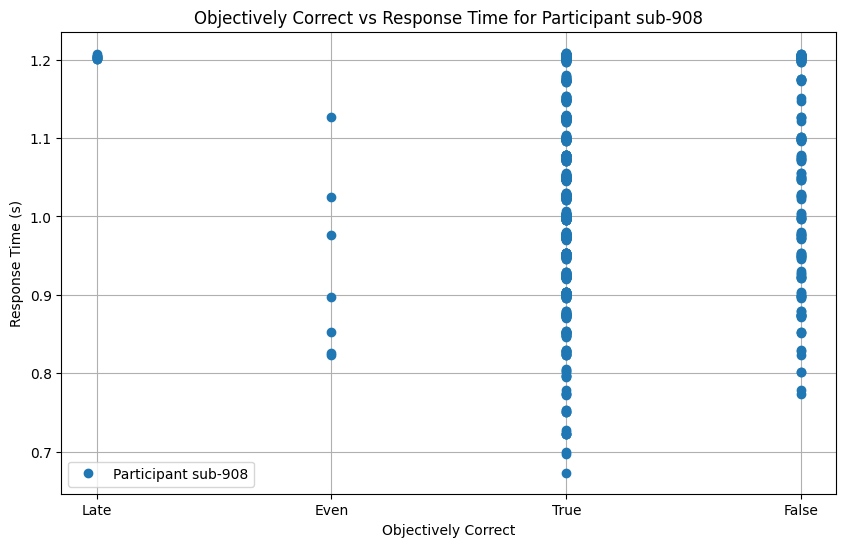

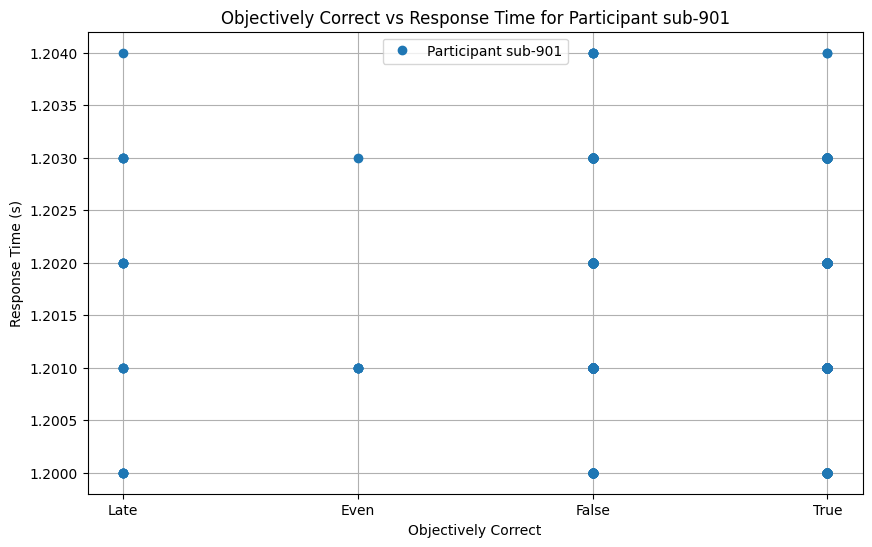

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
directory_path = '/Users/carlacoca/Documents/master_internship/experiment_output_pilots/df_w_participant_id.csv'
df_w_participant_id = pd.read_csv(directory_path, delimiter=';')
print(df_w_participant_id.columns)

# Read the CSV file and rename the problematic column
df_w_participant_id = pd.read_csv(directory_path, delimiter=';')

# Print the original column names to review
print("Original column names:")
print(df_w_participant_id.columns)

# Rename the problematic column that merged participant_id and other columns
df_w_participant_id.columns = df_w_participant_id.columns.str.strip()  # Remove any trailing/leading spaces

# Fix the column 'reward_amount,participant_id,session_number,trial'
df_w_participant_id.rename(columns={'reward_amount,participant_id,session_number,trial': 'reward_amount_participant_id_session_number_trial'}, inplace=True)

# Manually split this into individual columns, assuming the correct format
df_w_participant_id[['reward_amount', 'participant_id', 'session_number', 'trial']] = df_w_participant_id['reward_amount_participant_id_session_number_trial'].str.split(',', expand=True)

# Drop the merged column since it's now separated
df_w_participant_id.drop(columns=['reward_amount_participant_id_session_number_trial'], inplace=True)

# Now print the cleaned column names to verify
print("Cleaned column names:")
print(df_w_participant_id.columns)

for participant in df_w_participant_id['participant_id'].unique():
    # Filter data for this participant
    participant_data = df_w_participant_id[df_w_participant_id['participant_id'] == participant]
    
    # Extract the columns you want to plot
    objectively_correct = participant_data['objectively_correct']
    response_time = participant_data['RT_s']
    
    # Create a new plot for each participant
    plt.figure(figsize=(10, 6))
    plt.plot(objectively_correct, response_time, 'o', label=f'Participant {participant}')

    # Add plot labels and title
    plt.xlabel('Objectively Correct')
    plt.ylabel('Response Time (s)')
    plt.title(f'Objectively Correct vs Response Time for Participant {participant}')
    
    # Add a legend and grid
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()




# Have participants alternating performance, and look at window 6 trials after every switch so find out a way to plot that specifically creating a specific line for each participant instead of the average 


In [66]:
# so we specifically look at the objective_performance. if you average all of them you get a percentage out (if you multiply by 100
directory_path = '/Users/carlacoca/Documents/master_internship/experiment_output_pilots/df_w_participant_id.csv'

import pandas as pd 
df_w_participant_id = pd.read_csv('/Users/carlacoca/Documents/master_internship/experiment_output_pilots/df_w_participant_id.csv', delimiter=';')
print (df_w_participant_id.head())
# Map the 'objectively_correct' values
mapping = {
    'False': 0,
    'Even': -1,
    'True': 1
}

   trial  emotional_cue_time response objectively_correct  \
0      0        1.720004e+09       up                Even   
1      1        1.720004e+09     down                Even   
2      2        1.720004e+09       up                Even   
3      3        1.720004e+09     down                Even   
4      4        1.720004e+09     down                Even   

  subjectively_correct  response_time   RT_s  stimuli_type  iti  \
0                False   1.720004e+09  1.017             1    3   
1                 True   1.720004e+09  0.593             3    3   
2                False   1.720004e+09  0.554             1    2   
3                 True   1.720004e+09  0.650             3    2   
4                False   1.720004e+09  0.774             3    2   

   probability_condition  face_type stimuli_name  reward_amount  \
0                     50          3     Angry_b3           -0.1   
1                     50          1     Happy_b1            0.0   
2                     50     

In [1]:
df_w_participant_id['objectively_correct_numeric'] = df_w_participant_id['objectively_correct'].map(mapping)
average_objectively_correct = df_w_participant_id['objectively_correct_numeric'].mean()

#print(f"The average objectively correct score across all participants is: {average_objectively_correct}")

average_correct_percentage = average_objectively_correct * 100
#print(f"The average objectively correct score across all participants (multiplied by 100) is: {average_correct_percentage}")

#pd.set_option('display.max_rows', None)

df_sorted = df_w_participant_id.sort_values(by=['participant_id'], ascending=[True])

# reset the index after sorting
df_sorted = df_sorted.reset_index(drop=True)

print(df_sorted)
pd.set_option('display.max_rows', 500)

print(df_sorted)
output_path = '/Users/carlacoca/Documents/master_internship/experiment_output_pilots/df_sorted.csv'
df_sorted.to_csv(output_path, index=False, sep=';')




NameError: name 'df_w_participant_id' is not defined